(a:1,(d:2,b:3,c:4),(e:1, f:2))
a:1
(d:2,b:3,c:4)
d:2
b:3
c:4
(e:1, f:2)
e:1
 f:2
a 1
d 2
b 3
c 4
e 5
f 6
{None: array([4, 3, 1, 1, 0, 0, 1, 4]), 'a': array([4, 1, 1, 0, 4, 2, 2, 2]), 'd': array([4, 1, 0, 1, 3, 1, 0, 2]), 'b': array([4, 0, 1, 1, 4, 4, 3, 1]), 'c': array([1, 3, 2, 1, 0, 4, 4, 4]), 'e': array([3, 3, 0, 1, 2, 0, 1, 1]), 'f': array([2, 3, 2, 0, 0, 0, 2, 3])}
[[inf 11.  8.  6.  5.  8.]
 [inf  5.  6.  7. 10. 13.]
 [inf  4.  6.  9. 12. 15.]
 [inf  2.  5.  8. 11. 14.]
 [inf 11.  9.  8.  9. 12.]
 [inf  8.  7.  8.  9. 12.]
 [inf  8.  6.  7. 10. 13.]
 [inf  7.  5.  7. 10. 13.]]
number of leaf: 6
number of sites: 8
number of max copies: 5


KeyError: 'parsimony_score'

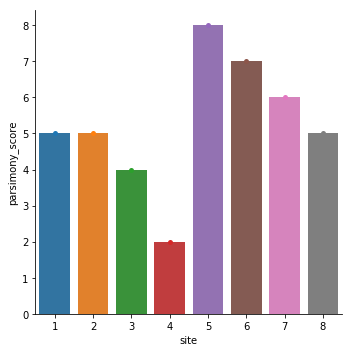

In [40]:
from dollo_tree import TreeNode
import _delete as dl
import numpy as np
import seaborn as sns
import parsing_tree_gwick as pt
import pandas as pd


tree_gw = "(a:1,(d:2,b:3,c:4),(e:1, f:2))"

tree1 = pt.loads(tree_gw)[0]

cn_max = 5
num_site = 8
leaf_cns = {}
tree1.count_leaves()

for node in tree1.nodes:
    leaf_cns[node.name] = np.random.randint(cn_max, size=num_site)
print(leaf_cns)
#leaf_cns = {"a":[1,2], "b":[2,4], "c":[3,6], "d":[4,8]}
#dl.calc_score_recursive(tree1, leaf_cns1, 1, 8)
#print(tree1.cn_score)
dl.calc_score_recursive_vect(tree1, leaf_cns, 1, cn_max, num_site)
print(tree1.cn_score)
print("number of leaf: %d" % tree1.num_leaves)
print("number of sites: %d" % num_site)
print("number of max copies: %d" % cn_max)

pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
                   columns=['a', 'b', 'c'])

pd.DataFrame(tree1.cn_score.transpose(), columns = [str(i+1) for i in range(num_site)]).to_csv("parsimony.csv")

fname = "parsimony.csv"
df = pd.read_csv(fname)

df["copy_number"] = [i for i in range(cn_max + 1)]
#pd.melt(df, id_vars = ["copy_number"], value_vars = [str(i+1) for i in range(num_site)], var_name = "num_site", value_name = "parsimony_score")
#ps_score.rename(rows = [str(i) for i in range(cn_max)])
#pd.melt(df, [str(i+1) for i in range(num_site)], id_values, var_name, value_name )
min_score = df.melt(id_vars = ["copy_number"], value_vars = [str(i+1) for i in range(num_site)], 
        var_name = "site_id", value_name = "parsimony_score")\
 .groupby("site_id")\
 .agg({"parsimony_score":"min"})
min_score['site'] = min_score.index
#type(min_score)
sns.catplot(x="site", y="parsimony_score", jitter=False, data=min_score)
sns.barplot(x="site", y="parsimony_score", data=min_score);




0      inf
1     11.0
2      8.0
3      6.0
4      5.0
5      8.0
6      inf
7      5.0
8      6.0
9      7.0
10    10.0
11    13.0
12     inf
13     4.0
14     6.0
15     9.0
16    12.0
17    15.0
18     inf
19     2.0
20     5.0
21     8.0
22    11.0
23    14.0
24     inf
25    11.0
26     9.0
27     8.0
28     9.0
29    12.0
30     inf
31     8.0
32     7.0
33     8.0
34     9.0
35    12.0
36     inf
37     8.0
38     6.0
39     7.0
40    10.0
41    13.0
42     inf
43     7.0
44     5.0
45     7.0
46    10.0
47    13.0
Name: parsimony_score, dtype: float64


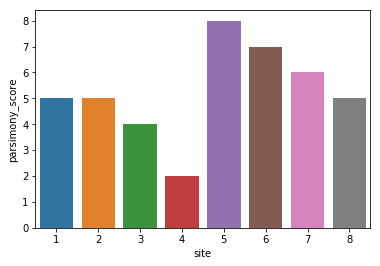

In [42]:
def plot_parsimony(fname, cn_max, num_site, min=False):
    df = pd.read_csv(fname)
    df["copy_number"] = [i for i in range(cn_max + 1)]
    df = df.melt(id_vars = ["copy_number"], value_vars = [str(i+1) for i in range(num_site)], 
            var_name = "site_id", value_name = "parsimony_score")\

     
    min_score = df.groupby("site_id")\
                .agg({"parsimony_score":"min"})
    min_score['site'] = min_score.index
    #type(min_score)
    max_hue = max(df["parsimony_score"])
    print(df["parsimony_score"])
    if min:
         sns.barplot(x="site", y="parsimony_score", data=min_score);
    else:
         sns.scatterplot(x="site_id", y="copy_number", data=df, hue="parsimony_score")
   


plot_parsimony("parsimony.csv", cn_max, num_site, True)    
    